Anna Wojciechowska, Oslo, January 2023  
test details:   
**salt(ish) water test in Oslofjord**  
date: 11th January  2023: 12:37 - 12:45     
place: Oslofjord  
GPS: 59.901508 N Lat - 10.7501903 E Lon   

air pressure 16cm above water level:  
994.4  [hPa] [WH-0180 meteo station](https://www.bruksanvisningpdf.no/clas-ohlson/wh-1080/bruksanvisning?p=3)

sensor data  (absolute pressure)  
[cm] - [mbar]   
0    -  978  
100  -  1086  
200  -  1183  
300  -  1280  
400  -  1380 (?) sensor was in the sand/soft bottom  

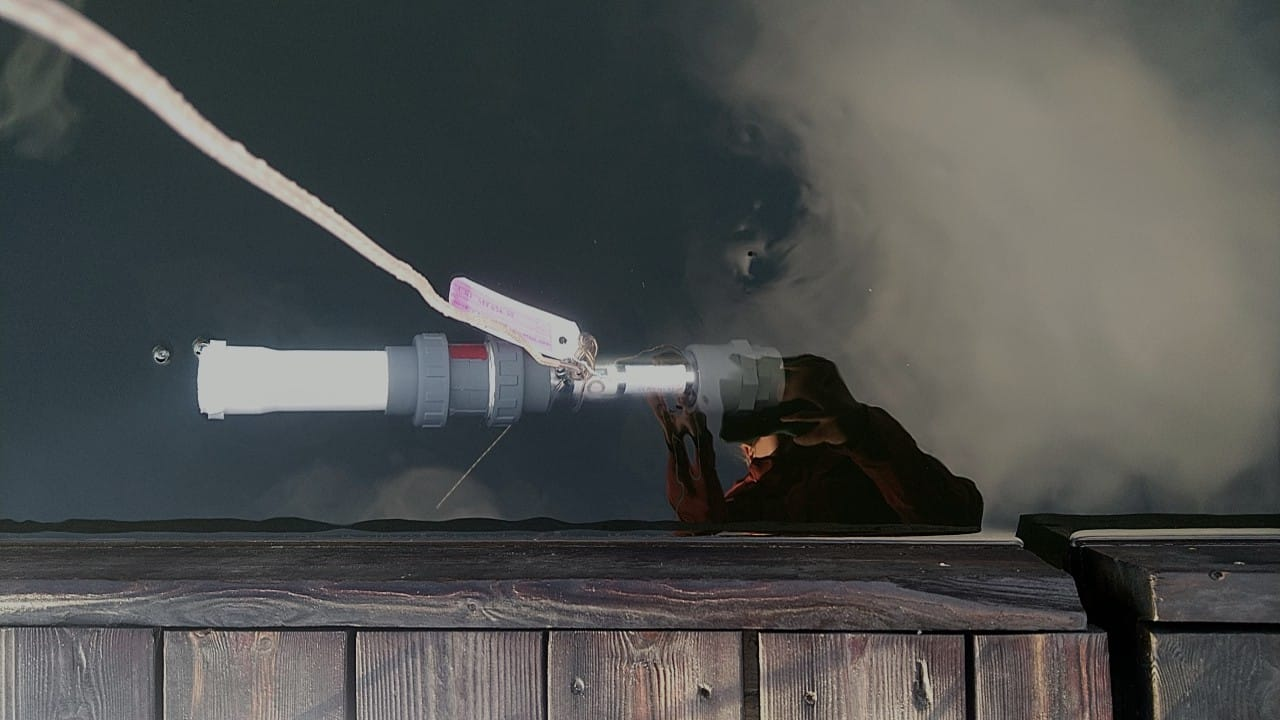

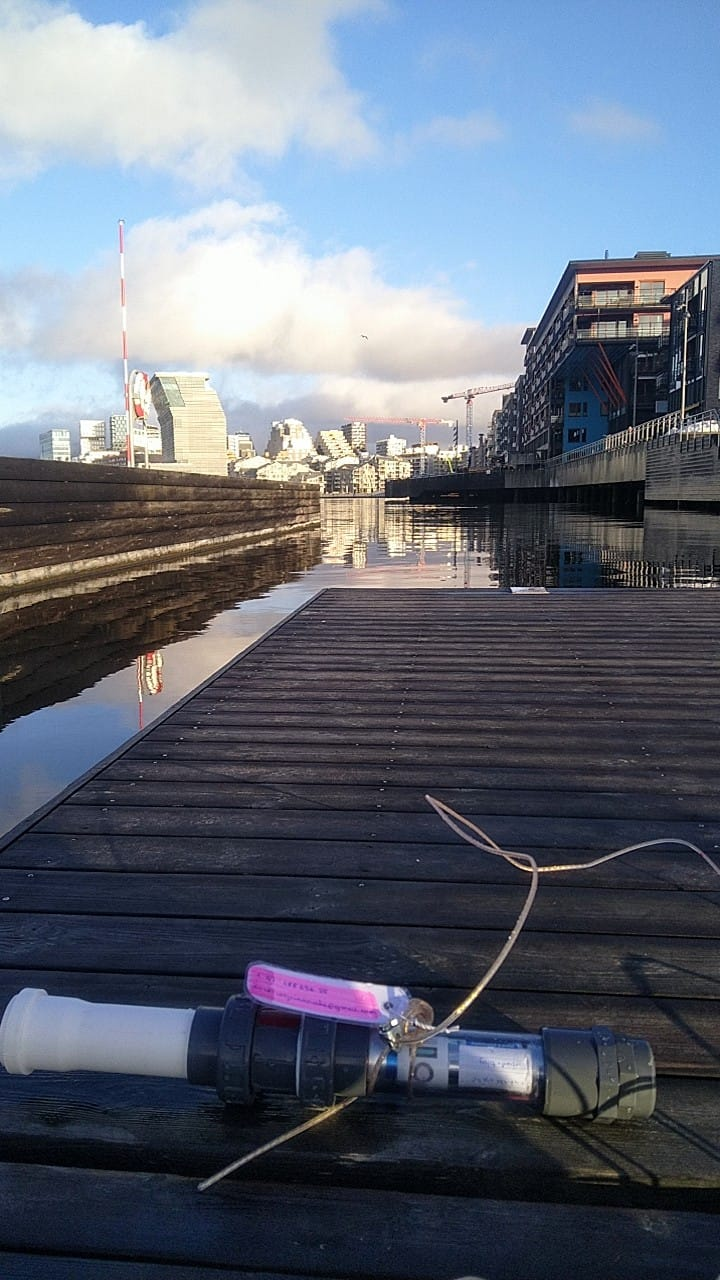

In [2]:
import pandas as pd
import statsmodels.formula.api as smf  # module to run ordinary least squares analysis
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.DataFrame(columns=['water_level_cm', 'pressure_mb'])
df.loc[0] = [0, 978]
df.loc[1] = [100, 1086]
df.loc[2] = [200, 1183]
df.loc[3] = [300, 1280]
df.loc[4] = [400, 1380]
df.head()

,water_level_cm,pressure_mb
0,0,978
1,100,1086
2,200,1183
3,300,1280
4,400,1380


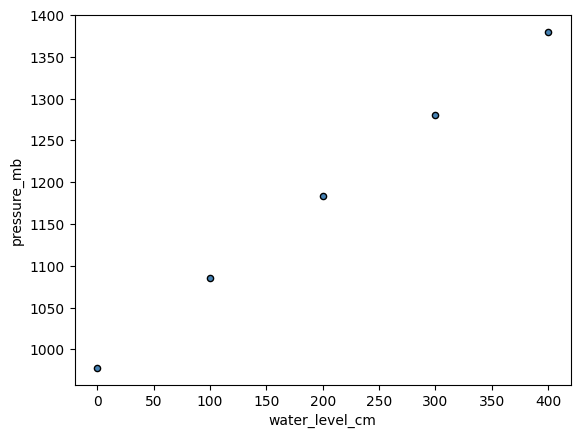

In [7]:
_ = df.plot.scatter(x='water_level_cm', y='pressure_mb', color = 'steelblue', edgecolor = 'black')

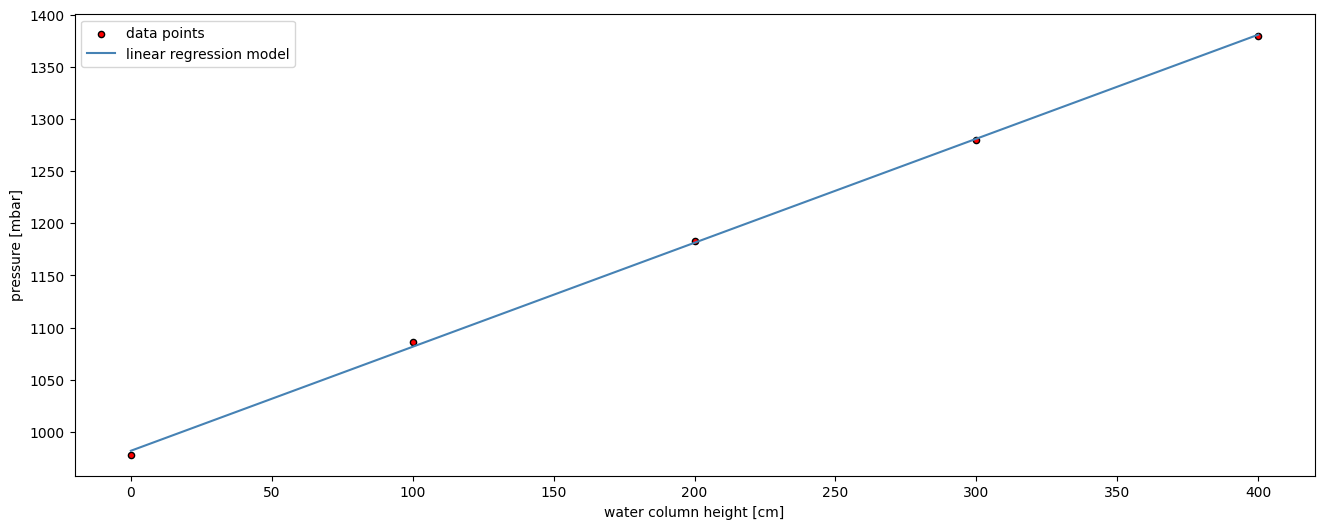

In [8]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 1, 1)

linfit = smf.ols(formula=' pressure_mb ~ water_level_cm', data=df).fit()
intercept, slope = linfit.params

plt.scatter(x=df['water_level_cm'],y=df['pressure_mb'],s=20,alpha=1,marker='o', color = 'red', edgecolor = 'black',  label  = 'data points')
x = np.linspace(df['water_level_cm'].min(), df['water_level_cm'].max(), 100)
y = intercept + slope*x
ax.plot(x,y, 'steelblue', label = 'linear regression model')
ax.set_ylabel('pressure [mbar]')
ax.set_xlabel('water column height [cm]')
_= ax.legend()

In [9]:
linfit.summary()

/home/anna/.local/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            pressure_mb   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7701.
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           3.26e-06
Time:                        21:49:56   Log-Likelihood:                -12.217
No. Observations:                   5   AIC:                             28.43
Df Residuals:                       3   BIC:                             27.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        981.8000      2.786    352.446      0.000     972.935     990.665
water_level_cm     0.9980      0.011     87.756      0.000       0.962       1.034
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.138
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.293
Skew:                           0.293   Prob(JB):                        0.864
Kurtosis:                       1.969   Cond. No.                         424.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""